### 5.2 합성곱 신경망 맛보기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

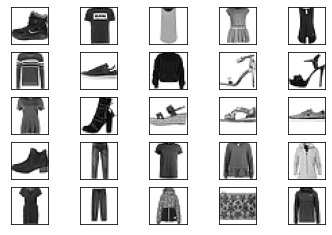

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
               
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.5321 - accuracy: 0.8115
Epoch 2/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.3990 - accuracy: 0.8549
Epoch 3/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.3653 - accuracy: 0.8668
Epoch 4/5
1875/1875 [==============================] - 2s 853us/step - loss: 0.3466 - accuracy: 0.8722
Epoch 5/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.3314 - accuracy: 0.8782
313/313 - 0s - loss: 0.3485 - accuracy: 0.8776


[0.34847742319107056, 0.8776000142097473]

In [5]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [6]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])
 
model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7979 - accuracy: 0.7025
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5261 - accuracy: 0.8061
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4570 - accuracy: 0.8336
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4139 - accuracy: 0.8505
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3875 - accuracy: 0.8597
313/313 - 1s - loss: 0.4124 - accuracy: 0.8523


[0.4123704135417938, 0.8522999882698059]

In [8]:
!pip install scikit_image

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [9]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [10]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

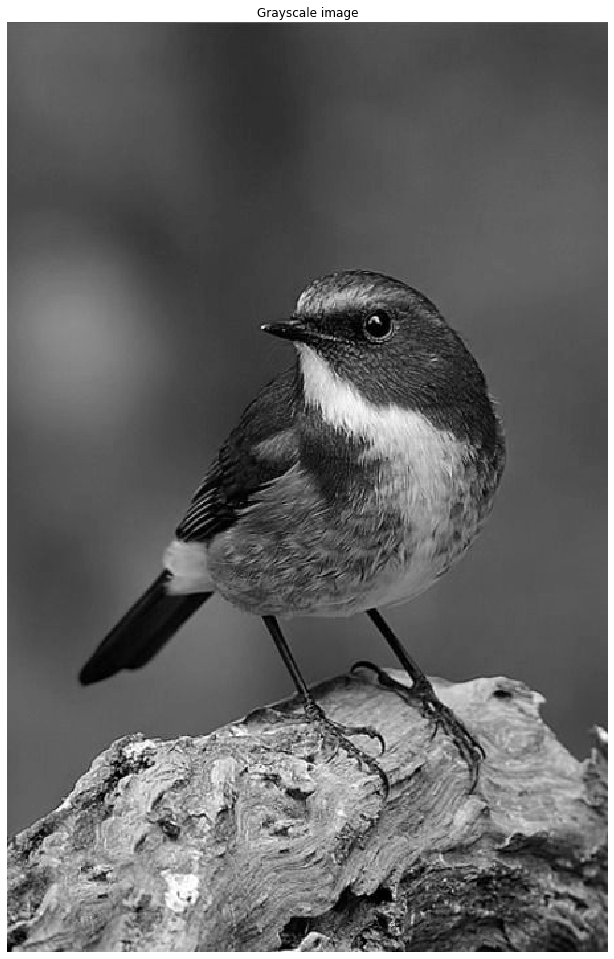

In [11]:
image_gs = imread('./data/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [12]:
print_image_summary(image_gs, ['G'])

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000
